# Chapter 4: Classification
Predicting qualitative responses.

Linear regression is not suited because any encoding implies an ordering of the categories and selecting a distance among them, which in most cases is not sensible. In the binary case, one could transform the response variable into 0s and 1s and build a linear regression model: this would lead to an OK model, even if some predictions could be larger than 1, and so it would be difficult to interpret the result of it as a probability of classifying the input as belonging to class 1.

## Logistic Regression

Logistic regression models the probability that $Y$ belongs to a particular category, e.g. $\mathbb{P}(\text{default=yes}|\text{balance}) = p(\text{balance})$ will range between 0 and 1, so, given any value for balance, a prediction for default can be made.

Logistic function: $p(X) = \dfrac{e^{\beta_0 + \beta_1X}}{1+e^{\beta_0 + \beta_1X}}$, with outputs between 0 and 1. From the definition it follows that:

$$
\dfrac{p(X)}{1-p(X)} = e^{\beta_0 + \beta_1X}.
$$
The quantity on the left is called `odds`, and ranges from 0 to $\infty$.
Taking the logarithm,
$$
\log\left({\dfrac{p(X)}{1-p(X)}}\right) = \beta_0 + \beta_1X.
$$
The quantity on the left is called `logit` or `log-odds`, which is linear in $X$. Here, increasing $X$ by 1 unit changes the log-odds by $\beta_1$, which does not correspond to the change in $p(X)$: that will depend on the current value of $X$, too.

### Estimating the coefficients

Maximum Likelihood: we try to find $\hat{\beta}_0$ and $\hat{\beta}_1$ such that plugging these estimates into the model for $p(X)$ yields a number close to one for all instances of one class, and a number close to zero for all instances of the other class. The goal is to find $\hat{\beta}_0$ and $\hat{\beta}_1$ which maximize the following function:

$$
l(\beta_0, \beta_1) = \prod_{i: y_i=1}p(x_i)\prod_{j: y_j=0}(1-p(x_j)).
$$

Then, many considerations done for the linear regression are still valid for the logistic regression, noting that the $z$-statistic replaces the $t$-statistic. The estimated intercept of the logistic regression is usually not interesting: its main purpose is to adjust the average fitted probabilities to the proportion of ones in the data.

Then, prediction is performed simply using 
$
\hat{p}(X) = \dfrac{e^{\hat{\beta}_0 + \hat{\beta}_1X}}{1+e^{\hat{\beta}_0 + \hat{\beta}_1X}}.
$
For categorical input variables, one can use the same approach seen for linear regression, using dummy variables.

### Multiple logistic regression

Extends analogously to the linear regression case.

### Logistic regression for more than 2 response classes

Possible, but not frequently used.

## Linear Discriminant Analysis (LDA)

Logistic regression involves directly modeling $\mathbb{P}(Y = k|X = x)$ using the logistic function. We now consider an alternative and less direct approach to estimating these probabilities. In this alternative approach, we model the distribution of the predictors $X$ separately in each of the response classes (i.e. given $Y$), and then use Bayes’ theorem to flip these around into estimates $\mathbb{P}(Y = k|X = x)$.

We define:
- $\pi_k$: prior probability that an observation comes from the $k$-th class (usually this is the proportion of responses of class $k$ in the training set);
- $f_k(x) = \mathbb{P}(X = x| Y=k)$ the density function of $X$ for the $k$-th class.
Then Bayes states that
$$
p_k(x) = \mathbb{P}(Y=k | X=x) = \dfrac{\pi_kf_k(x)}{\sum_{l=1}^{K}\pi_lf_l(x)}.
$$

$p_k(X)$ is called posterior probability, and we want to estimate it to get as close as possible to the Bayes Classifier, which has the lowest possible error rate out of all classifiers.

see a clear example on https://en.wikipedia.org/wiki/Naive_Bayes_classifier

### case $p=1$

Let's assume that $f_k(x)$ is normal or Gaussian, i.e.
$$
f_k(x) = \dfrac{1}{\sqrt{2\pi}\sigma_k}\exp{\left(-\dfrac{(x-\mu_k)^2}{2\sigma^2_k}\right)}.
$$

We also assume that all variances are equal, so we will drop the $k$ subscript
With some calculus, one can show that assigning an observation to the class for which $p_k(x)$ is largest is equivalent to assigning it to the class for which
$$
\delta_k(x) = x \cdot \dfrac{\mu_k}{\sigma^2} - \dfrac{\mu^2_k}{2\sigma^2} + \log{\pi_k}
$$
is largest.

We have to estimate $\mu_1, ..., \mu_k$, $\pi_1, ..., \pi_k$ and $\sigma^2$. LDA does it in the following way:

- $\hat{\mu}_k = \dfrac{1}{n_k}\sum_{i:y_i=k}{x_i}$ ---- (average of all training observations from class $k$),

- $\hat{\sigma}^2 = \dfrac{1}{n-K}\sum_{k=1}^{K}\sum_{i:y_i=k}(x_i-\hat{\mu}_k)^2$ ---- (weighted average of variances for each class),

- $\pi_k = \dfrac{n_k}{n}$ ---- (proportion of training observations of class $k$),

where $n$ is the size of the training set and $n_k$ the number of training observations having $k$ as response class.

So LDA assigns $X=x$ to the class for which
$$
\hat{\delta}_k(x) = x \cdot \dfrac{\hat{\mu}_k}{\hat{\sigma}^2} - \dfrac{\hat{\mu}^2_k}{2\hat{\sigma}^2} + \log{\hat{\pi}_k}
$$
is largest, and the equation is linear in $x$, whence the name.

### case p>1

Analogously using multivariate Gaussian distribution and covariance matrix.

### Remark

In a binary setting, the threshold of the LDA can be manually adjusted to prefer precision over recall or vice-vicersa.

## Quadratic Discriminant Analysis (QDA)

Like LDA, the QDA classifier results from assuming that the observations from each class are drawn from a Gaussian distribution, and plugging estimates for the parameters into Bayes’ theorem in order to perform prediction. However, unlike LDA, QDA assumes that each class has its own covariance matrix, so that the $\delta$ function becomes quadratic in $x$.

- LDA: high bias, low variance
- QDA: low bias, high variance

Roughly speaking, LDA tends to be a better bet than QDA if there are relatively few training observations and so reducing variance is crucial. In contrast, QDA is recommended if the training set is very large, so that the variance of the classifier is not a major concern, or if the assumption of a common covariance matrix for the K classes is clearly untenable.

# LAB

In [1]:
library(ISLR)

In [2]:
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [3]:
dim(Smarket)

[1] 1250    9

In [4]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [5]:
cor(Smarket)

ERROR: Error in cor(Smarket): 'x' must be numeric


In [6]:
cor(Smarket[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


In [7]:
attach(Smarket)

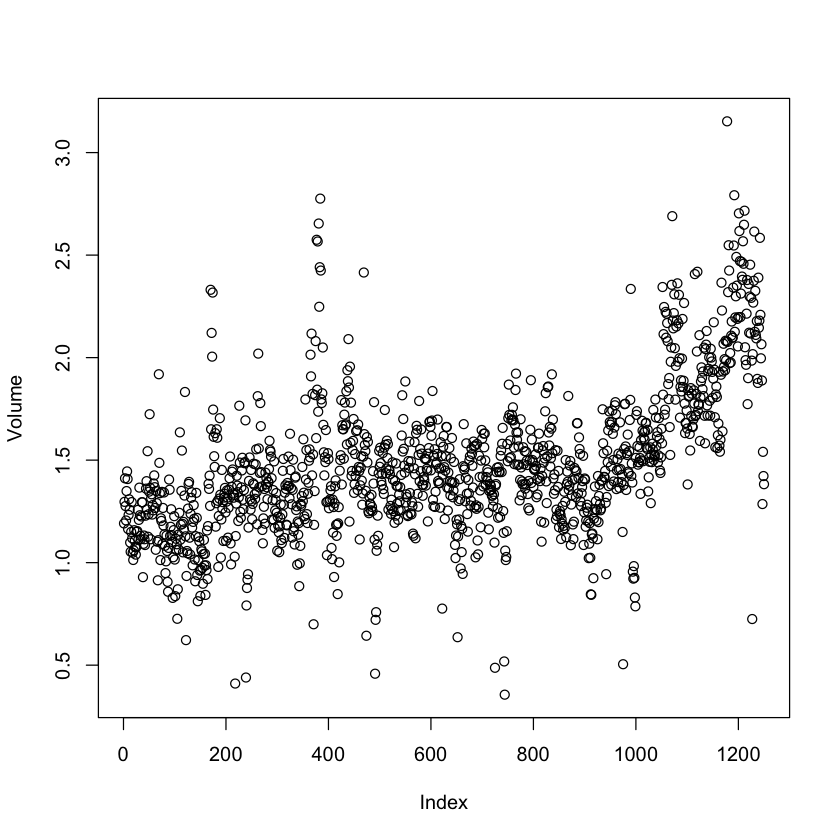

In [9]:
par(bg = 'white')
plot(Volume)

In [11]:
glm.fits = glm(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume, 
               data=Smarket,
               family=binomial)

In [12]:
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [13]:
glm.probs=predict(glm.fits, type="response")
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [15]:
contrasts(Direction)

,Up
Down,0
Up,1


In [16]:
glm.pred = rep("Down", 1250)
glm.pred[glm.probs>.5] = "Up"

In [17]:
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [ ]:
mean(glm)

In [19]:
mean(glm.pred == Direction)

[1] 0.5216

In [21]:
train = (Year<2005)
Smarket.2005 = Smarket[!train,]
dim(Smarket.2005)

[1] 252   9

In [23]:
Direction.2005 = Direction[!train]

In [24]:
glm.fits = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, 
             data=Smarket,
             family=binomial,
             subset=train)

glm.probs = predict(glm.fits, Smarket.2005, type="response")

In [25]:
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [26]:
mean(glm.pred==Direction.2005)

[1] 0.4801587

In [31]:
glm.fits=glm(Direction~Lag1+Lag2,
             data=Smarket,
             family=binomial, 
             subset=train)
glm.probs=predict(glm.fits, Smarket.2005, type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"

print("table")
table(glm.pred,Direction.2005)

print("mean")
mean(glm.pred==Direction.2005)

[1] "table"


        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] "mean"


[1] 0.5595238

In [33]:
predict(glm.fits,
        newdata=data.frame(Lag1=c(1.2,1.5), Lag2=c(1.1,-0.8)),
        type="response")


1         2 
0.4791462 0.4960939

In [34]:
library(MASS)
lda.fit=lda(Direction~Lag1+Lag2,
            data=Smarket,
            subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

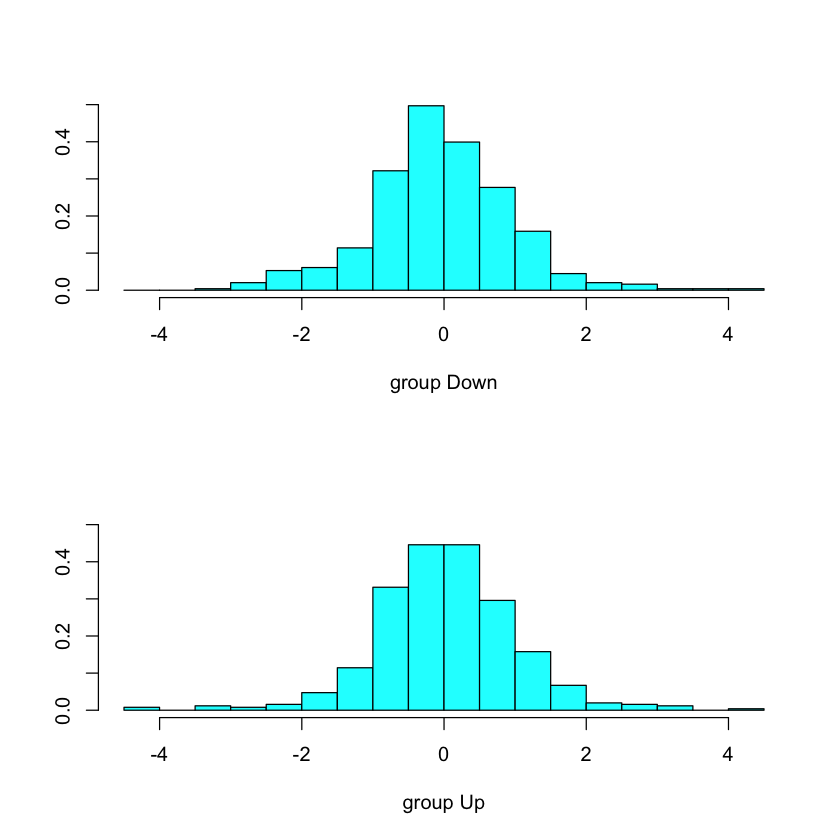

In [36]:
par(bg = 'white')
plot(lda.fit)

In [37]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

In [42]:
table(lda.pred$class,
      Direction.2005)

      Direction.2005
       Down  Up
  Down   35  35
  Up     76 106

In [52]:
max(lda.pred$posterior[, "Up"])
max(lda.pred$posterior[, "Down"])

[1] 0.5422133

[1] 0.520235

In [53]:
qda.fit=qda(Direction~Lag1+Lag2,
            data=Smarket,
            subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [58]:
qda.class = predict(qda.fit, Smarket.2005)$class
table(qda.class,Direction.2005)
"**********"
mean(qda.class==Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] "**********"

[1] 0.5992063

In [64]:
library(class)

train.X = cbind(Lag1,Lag2)[train,]
test.X = cbind(Lag1,Lag2)[!train,]
train.Direction = Direction[train]

In [66]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k=1)
table(knn.pred, Direction.2005)
mean(knn.pred==Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

In [67]:
knn.pred=knn(train.X,test.X,train.Direction,k=3)
table(knn.pred,Direction.2005)
mean(knn.pred==Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143